## Trending up

stories 530.373780036


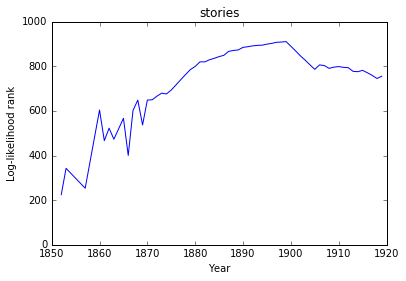

geography 485.924075926


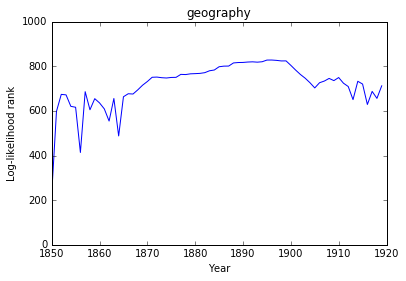

list 468.094429304


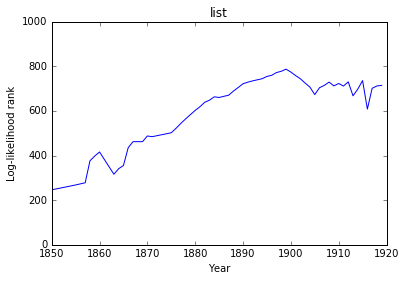

contract 465.144445152


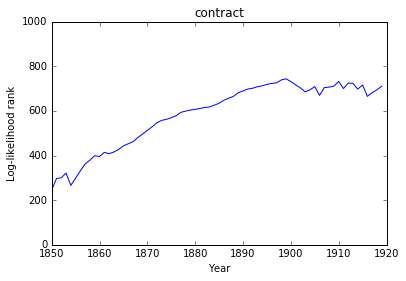

teaching 463.38361218


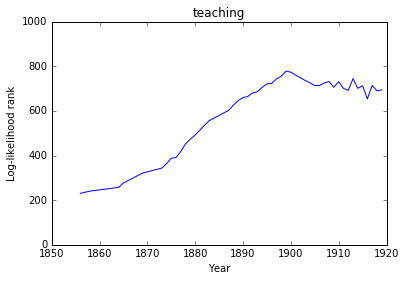

shakespeare 459.04515299


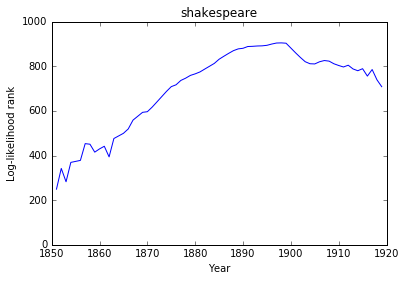

school 457.337777156


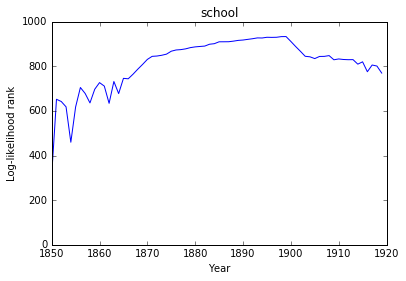

plays 453.083688118


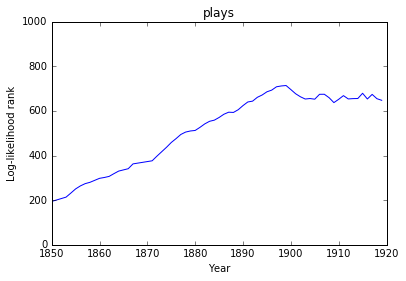

per 441.572625714


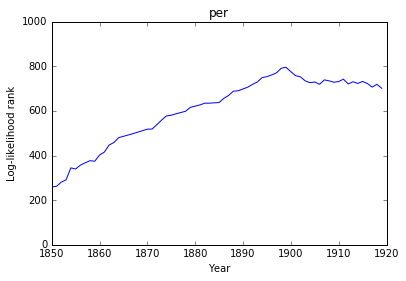

testament 431.714155449


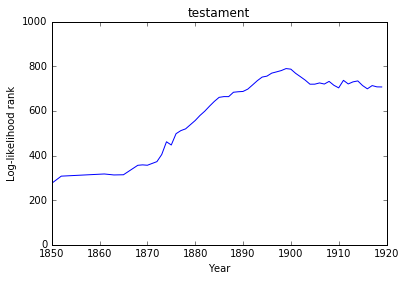

elementary 429.167844304


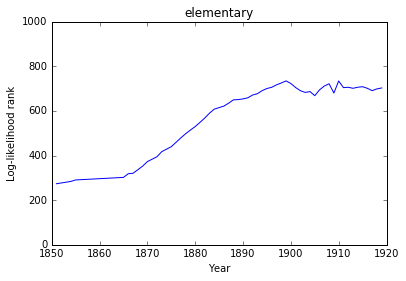

provisions 424.174032061


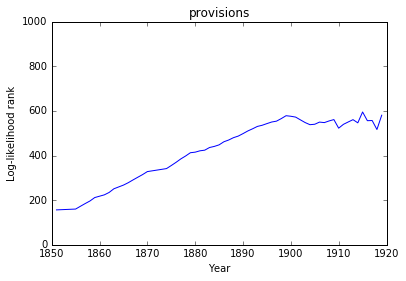

verse 414.446487838


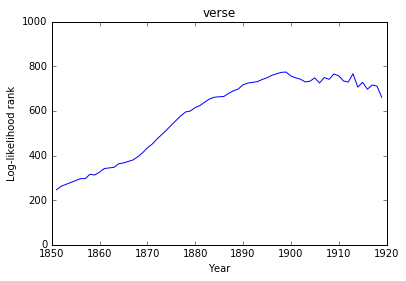

course 412.285540564


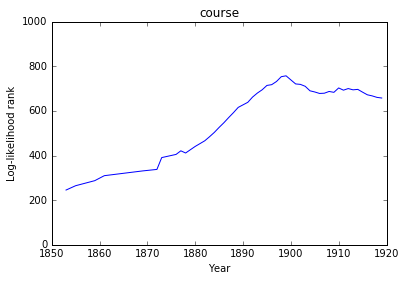

teacher 410.426206659


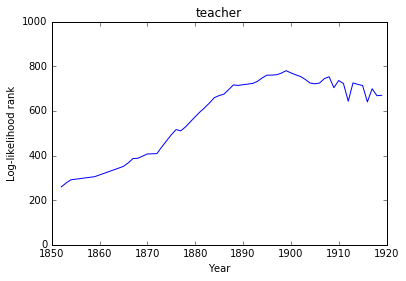

subject 402.472968025


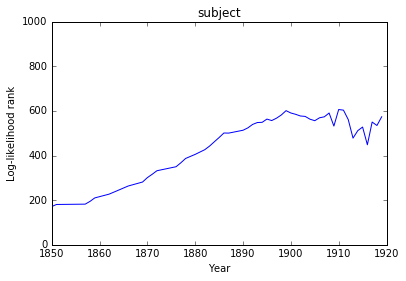

read 401.23429473


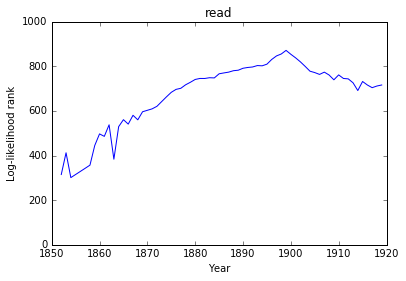

cent 390.721779836


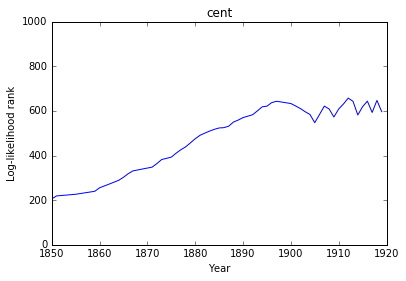

story 385.575836451


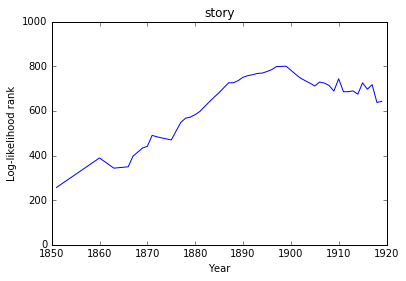

courses 378.959792735


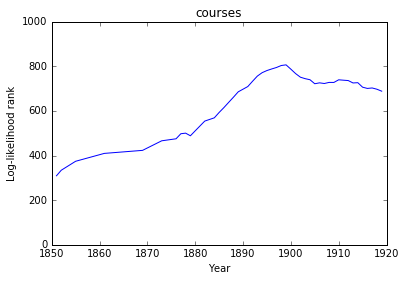

evidence 378.217434384


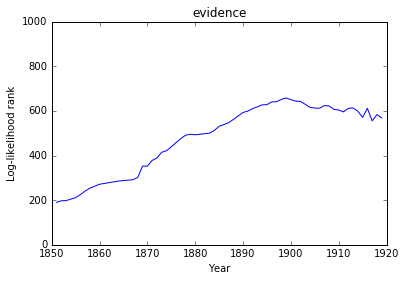

comparative 377.964114579


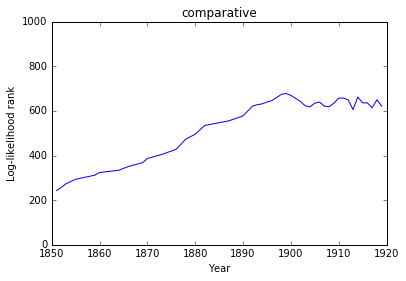

railroad 377.680883932


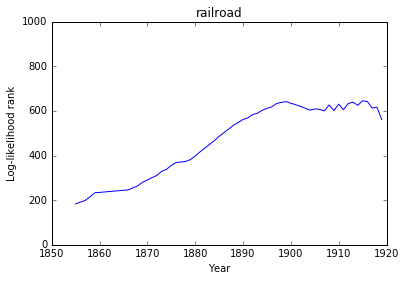

tax 370.560740886


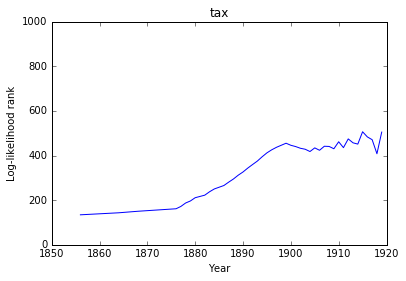

trial 369.907073804


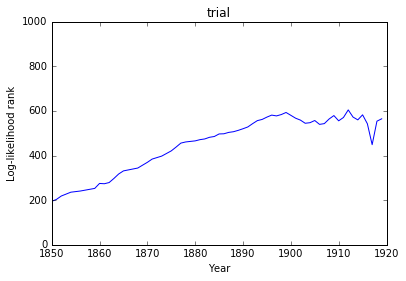

coal 367.728673702


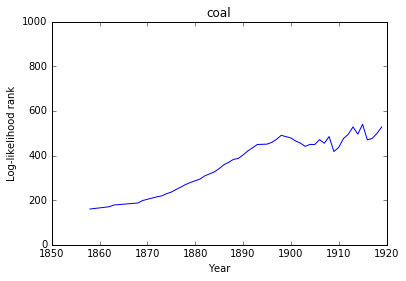

paid 363.641304469


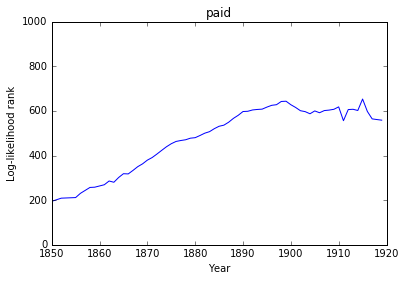

appreciation 363.412463441


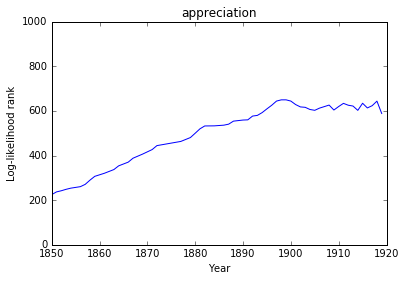

references 362.788035047


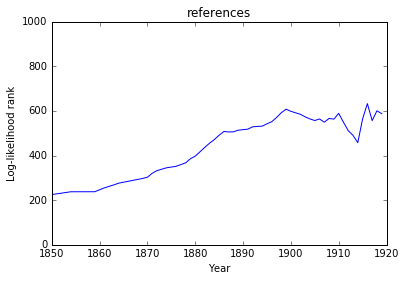

teachers 362.708911195


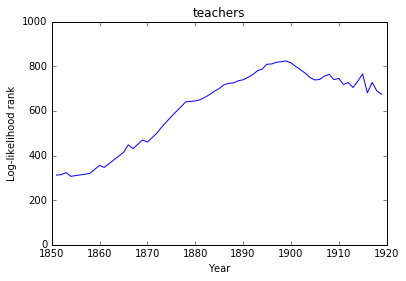

ed 354.133565727


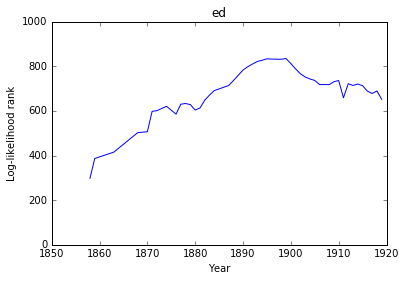

pupils 347.871486465


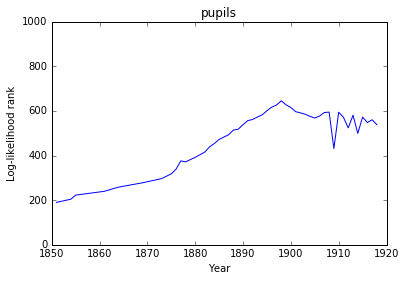

action 345.68754854


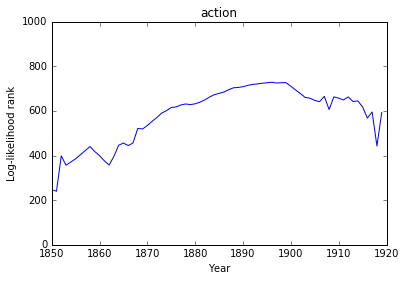

texts 343.762261718


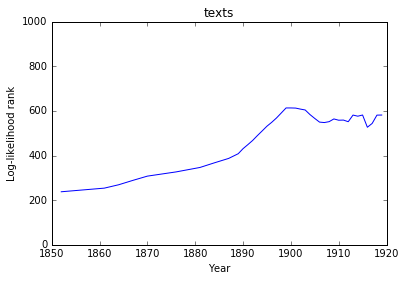

estate 341.379347451


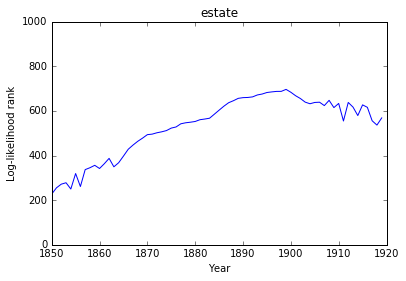

christian 335.095429439


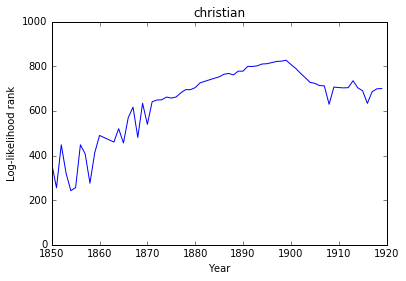

chemistry 333.485405795


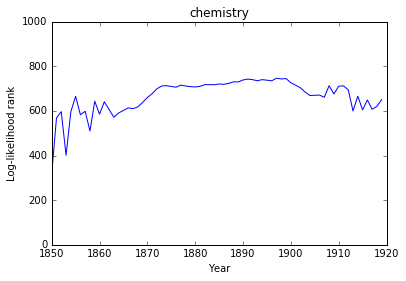

district 332.511938924


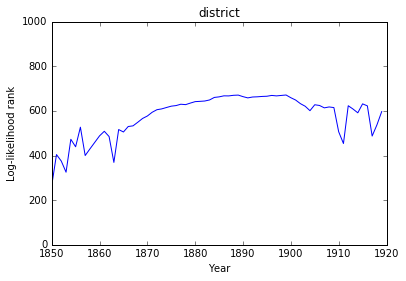

statute 330.995623874


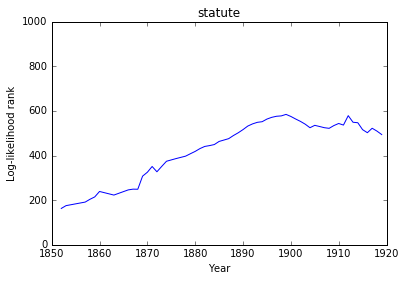

college 330.238822417


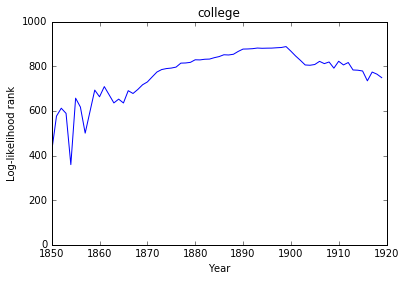

property 323.225190326


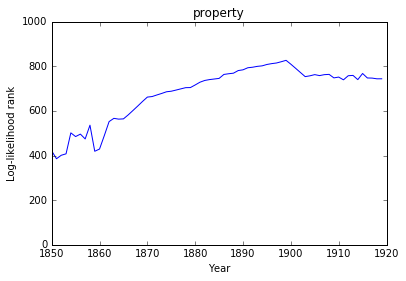

bible 315.016160618


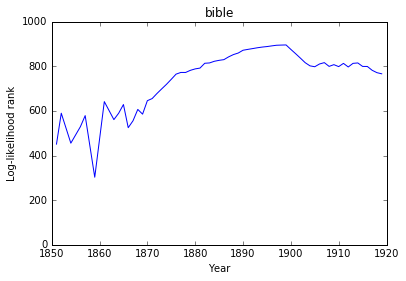

rate 313.03361339


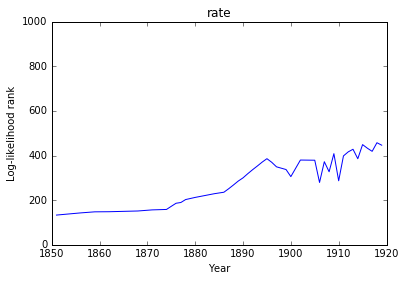

contemporary 309.174125361


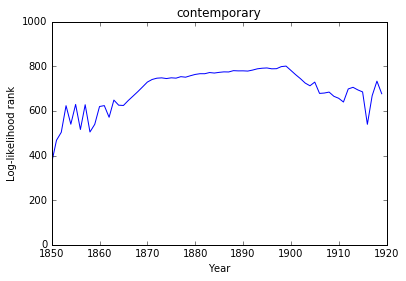

total 306.280865798


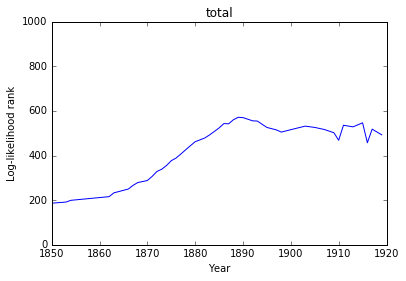

expression 301.369604686


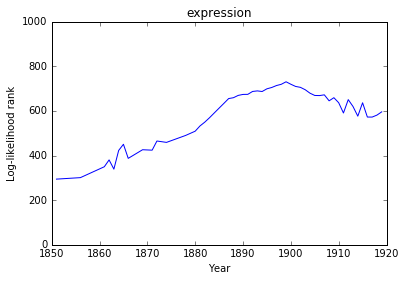

bonds 301.014682889


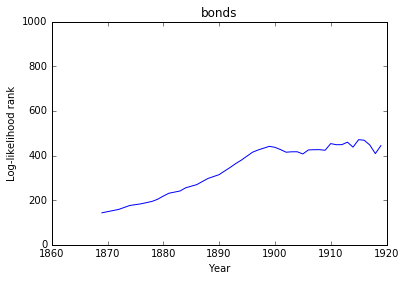

gas 300.028568631


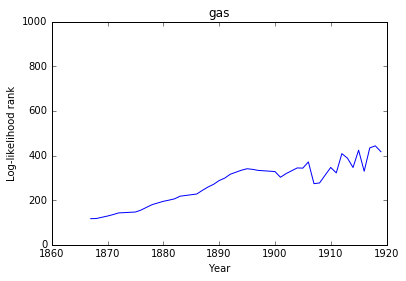

nineteenth 297.011153504


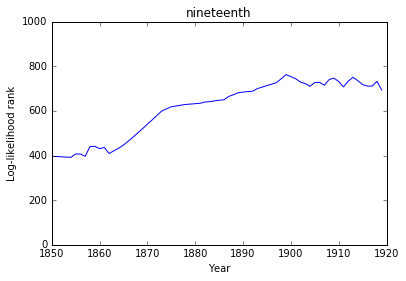

bank 294.841781896


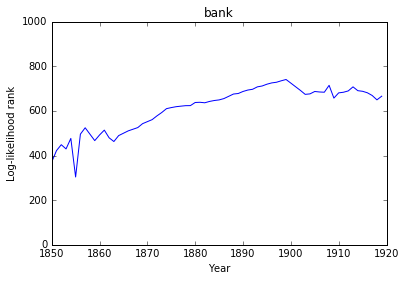

grammar 294.411130055


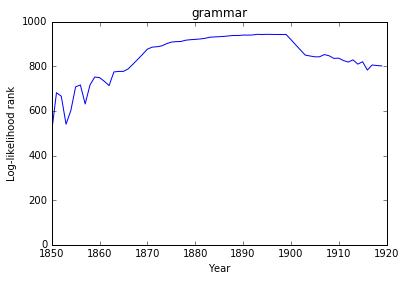

england 290.588805326


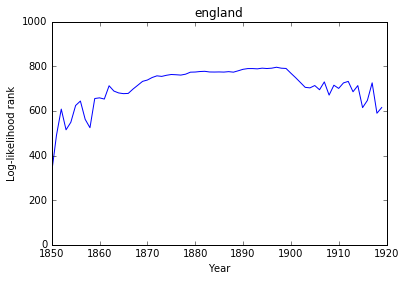

religion 289.117714129


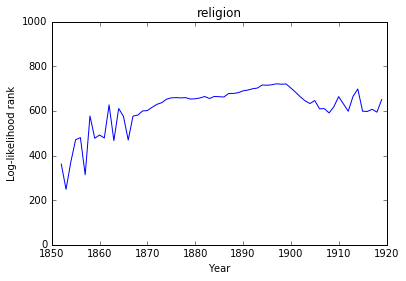

jury 288.907025824


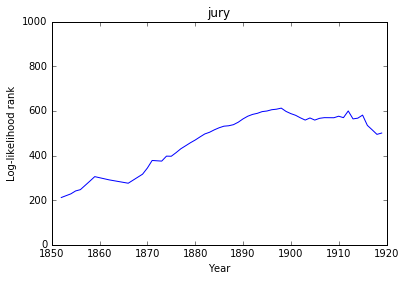

scholarship 288.715112607


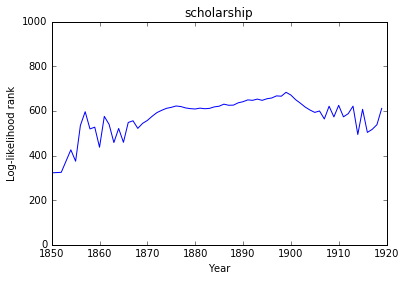

selected 287.494379876


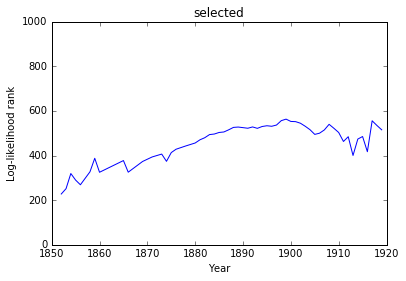

rhetoric 287.349598982


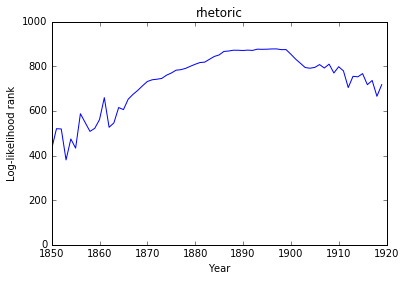

celtic 286.951578997


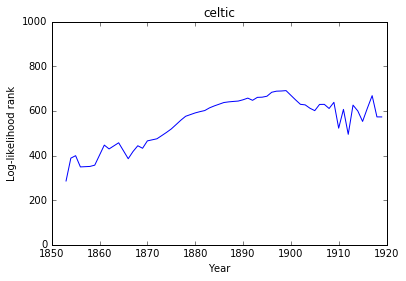

renaissance 285.152800484


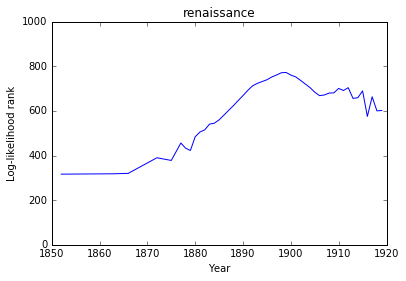

payment 281.596459205


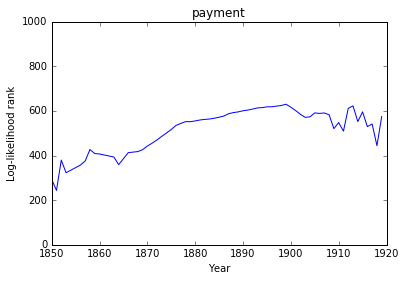

operation 279.326725999


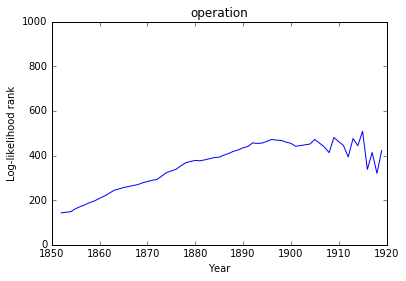

composition 278.998594169


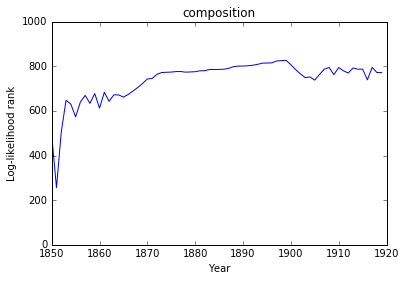

any 278.038934357


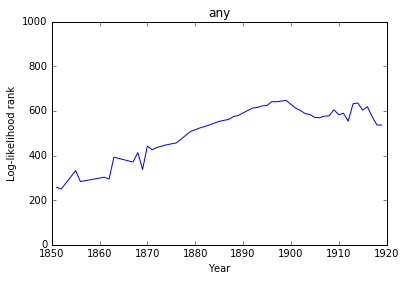

court 278.00778281


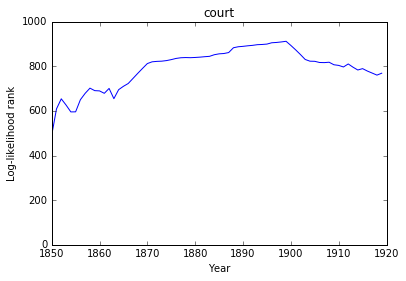

railway 276.8334084


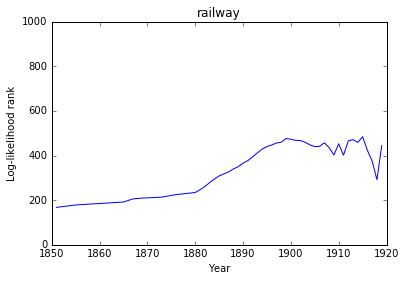

over 276.06656351


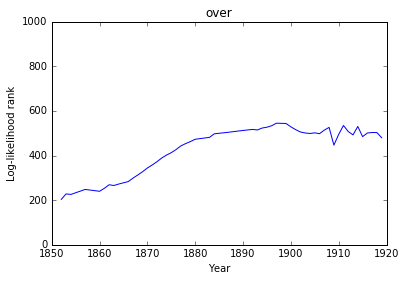

pounds 274.050471425


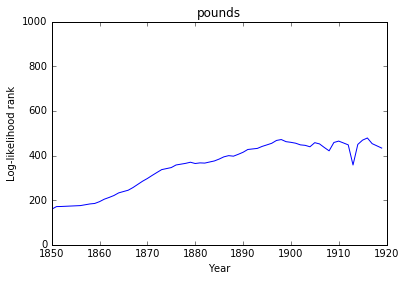

life 273.991562955


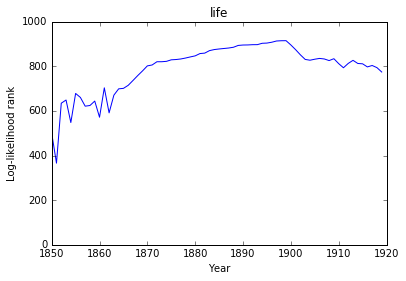

or 273.271933627


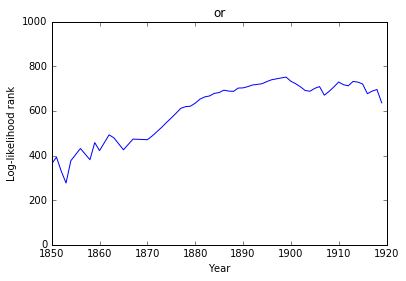

hebrew 271.569052516


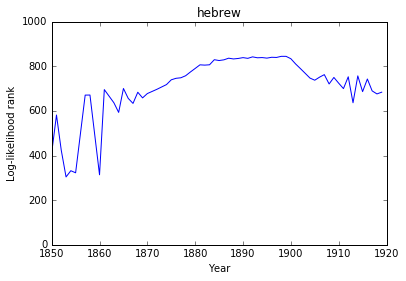

oil 271.426200958


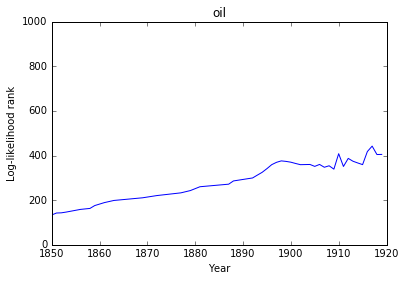

state 269.928306218


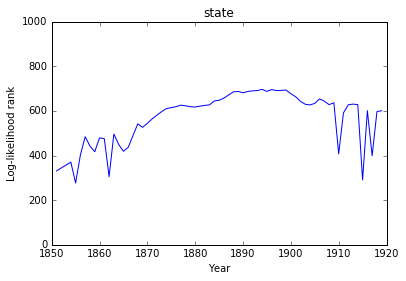

corporation 269.722778902


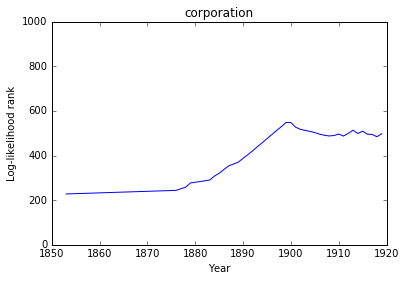

poet 264.052880631


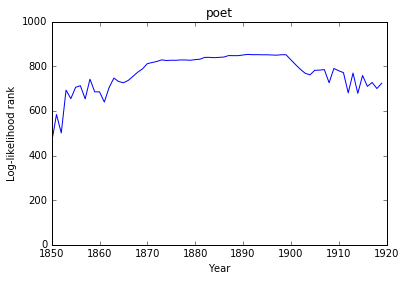

mathematics 262.167689446


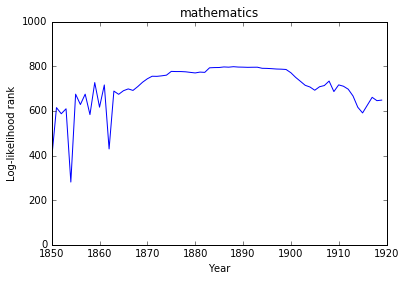

amount 261.228376685


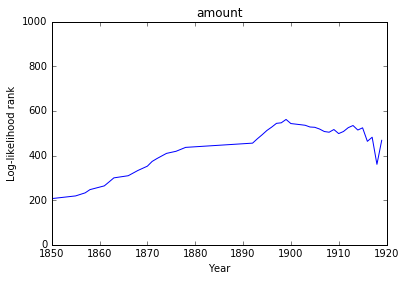

essay 256.951869599


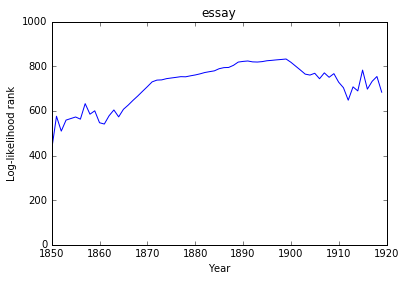

titles 256.172215894


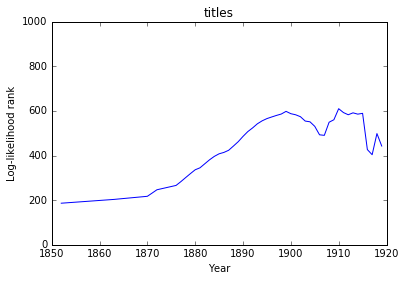

land 253.325995425


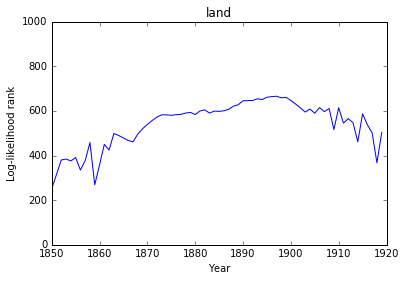

under 249.621834383


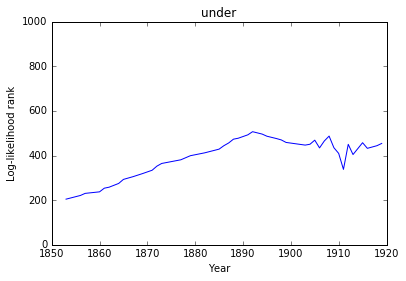

themes 244.798627643


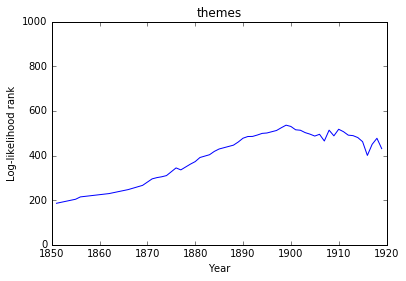

companies 243.638147083


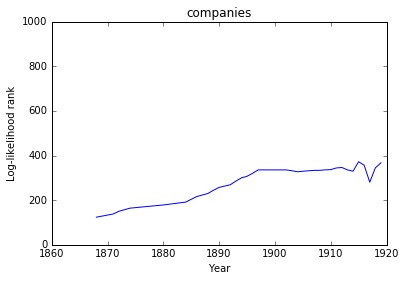

students 242.387815263


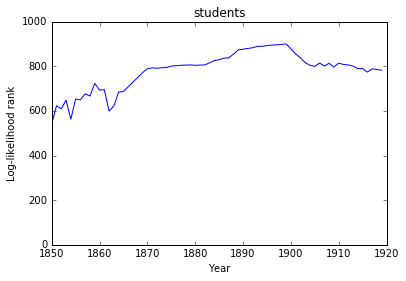

index 241.357485107


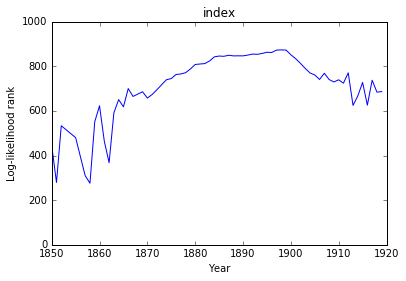

aims 240.26452914


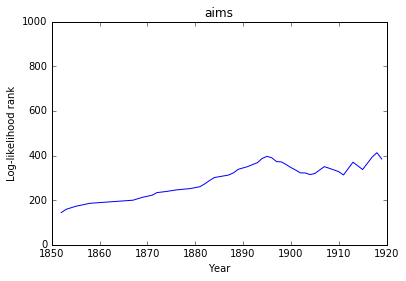

section 237.116054321


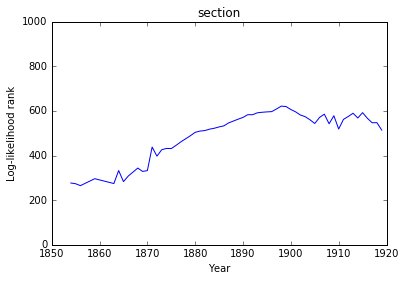

co 236.743036312


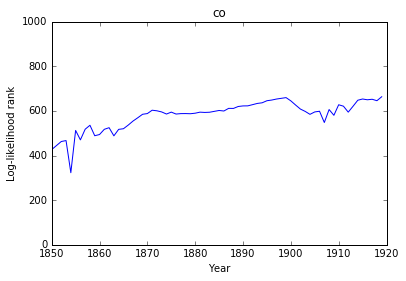

jurisdiction 236.578980969


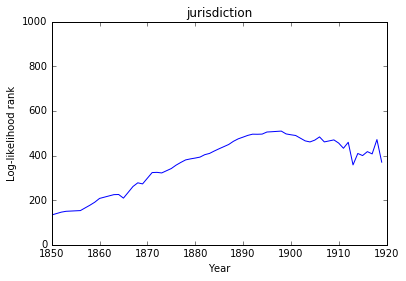

ideas 235.437106707


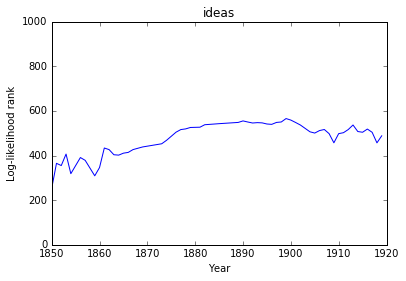

psychology 232.730862562


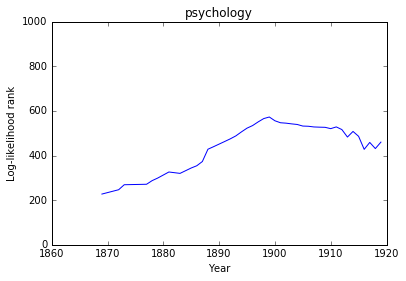

instructor 231.840803778


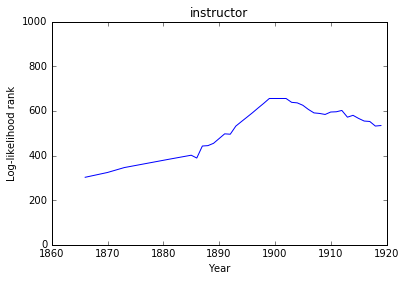

text 229.482405928


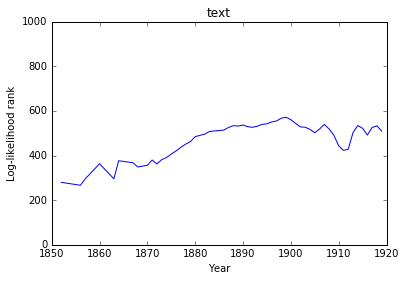

world 228.315877467


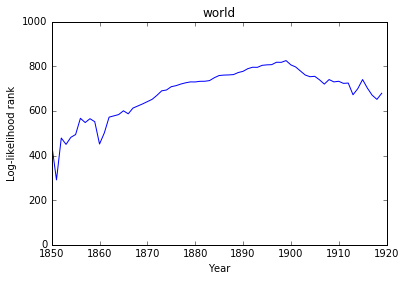

line 226.491071032


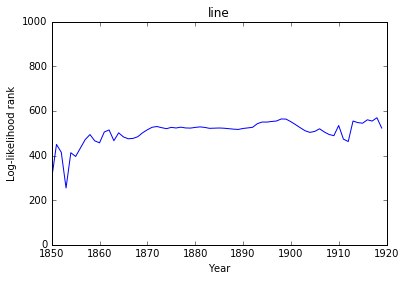

council 224.872348138


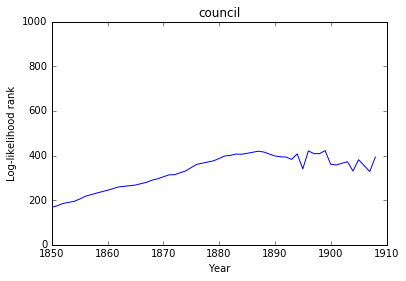

m 224.840735223


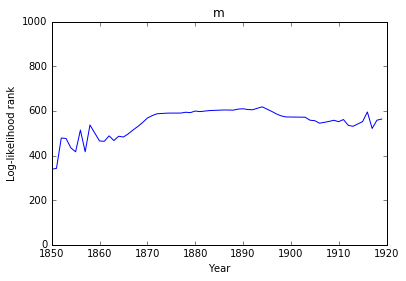

pupil 223.901118684


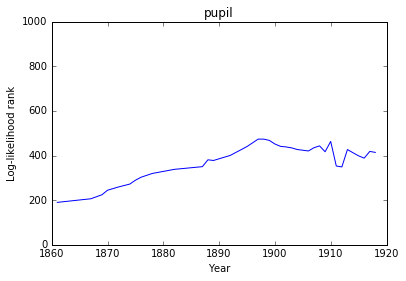

novel 223.193643437


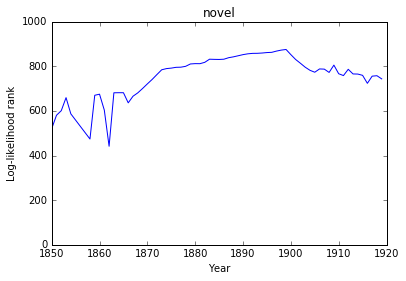

reading 221.943504582


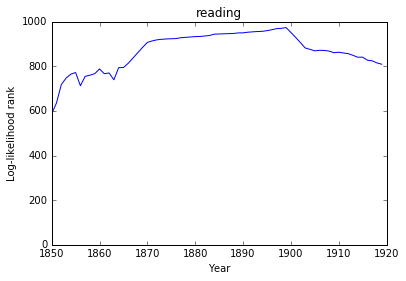

cost 219.860015352


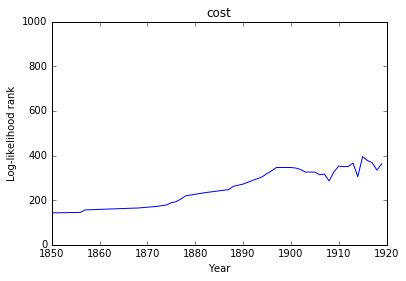

In [4]:
import numpy as np
from scipy import stats

from hol.topn_series import TopnSeries

import matplotlib.pyplot as plt
%matplotlib inline

years = range(1850, 1920)

topns = TopnSeries(years)
    
def print_query(score):
    
    result = topns.query(score, 41)
    
    for t, (s, v) in list(result.items())[:100]:
        print(t, v)
        plt.title(t)
        plt.xlabel('Year')
        plt.ylabel('Log-likelihood rank')
        plt.ylim(0, 1000)
        plt.plot(*zip(*s.items()))
        plt.show()
        
def score(s):
    y = list(s.values())
    return y[-1] - y[0]

print_query(score)